In [10]:
from app.pipeline import get_clusters
data_kmeans = get_clusters(cluster='kmeans')

Fitting KMeans
Dropping geometria
Dropping geometria


In [4]:
from app.dataprep.process_data import DateProcessor, Pivoter, DropNan, CategoricalEncoder, SelectiveScaler
from app.dataprep.load_data import GeometryDataProcessor
from sklearn.pipeline import Pipeline
from app.data_config import Config
import pandas as pd
import numpy as np


columns_date, columns, categorical_columns, exclude_normalize_columns, estadios = Config.date_columns, Config.columns, Config.categorical_columns, Config.exclude_normalized_columns, Config.estadios
data_safra = Config.safra

processor = GeometryDataProcessor()
data, _ = processor.load_data_geometry(query_name='all_data', safra=data_safra, columns=columns)

pipeline = Pipeline(steps=[
    ('date_processor', DateProcessor(columns_date=columns_date)),
    ('pivoter', Pivoter(pivot_columns=['soma_chuva'], index= ['produtividade', 'dataplantioinicio', 'datacolheitainicio', 'textura','geometria'], pivot_switch=True)),
    ('categorical_encoder', CategoricalEncoder(columns=categorical_columns)),
    # ('scaler', SelectiveScaler(exclude_columns=exclude_normalize_columns)),
    ('drop_nan', DropNan())
])

data = pipeline.fit_transform(data)
data

Arquivo app/data/csv/all_data.csv já existe.


,produtividade,dataplantioinicio,datacolheitainicio,geometria,soma_chuva_r1-r2,soma_chuva_r2-r3,soma_chuva_r3,soma_chuva_r3-r4,soma_chuva_r3-r4-2,soma_chuva_r4,...,soma_chuva_r6-r7,soma_chuva_v0,soma_chuva_v1,soma_chuva_v2-v3,soma_chuva_v4-v5,textura_1. Arenosa (até 15%),textura_2. Media Arenoso (15~25%),textura_3. Media Argiloso (25~40%),textura_4. Argiloso (40~60%),textura_5. Muito Argiloso (Acima 60%)
2,7.48,278,38,"{""type"": ""Polygon"",""coordinates"":[[[-53.495553...",7.8,70.2,2.2,33.2,14.9,1.4,...,173.5,19.4,11.4,13.2,41.5,0,0,1,0,0
4,8.52,262,8,"{""type"": ""Polygon"",""coordinates"":[[[-53.553744...",17.8,4.0,0.0,54.1,71.9,15.6,...,23.2,31.4,20.6,18.6,21.2,0,0,0,1,0
7,9.11,263,8,"{""type"": ""Polygon"",""coordinates"":[[[-53.546229...",17.3,4.0,0.0,54.1,71.9,15.6,...,23.2,28.4,19.4,18.6,21.7,0,0,0,1,0
10,9.55,262,8,"{""type"": ""Polygon"",""coordinates"":[[[-53.564901...",17.8,4.0,0.0,54.1,71.9,15.6,...,23.2,31.4,20.6,18.6,21.2,0,0,0,1,0
12,10.58,322,90,"{""type"": ""Polygon"",""coordinates"":[[[-53.466887...",73.0,41.3,19.3,17.8,30.6,22.4,...,172.5,73.5,38.6,10.5,22.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,89.81,265,20,"{""type"": ""Polygon"",""coordinates"":[[[-58.872655...",0.0,1.4,17.2,28.6,19.2,0.2,...,86.8,104.6,3.2,42.8,74.0,0,0,0,1,0
2619,91.88,283,31,"{""type"": ""Polygon"",""coordinates"":[[[-54.165652...",52.2,0.0,4.2,55.6,31.0,52.0,...,0.0,65.8,41.4,18.2,60.8,0,0,1,0,0
2620,92.15,273,33,"{""type"": ""Polygon"",""coordinates"":[[[-54.106246...",11.2,0.8,28.8,7.4,8.6,27.2,...,162.2,110.8,5.8,19.6,25.4,0,0,0,1,0
2621,93.85,276,38,"{""type"": ""Polygon"",""coordinates"":[[[-54.109819...",5.4,29.4,5.2,9.8,28.2,32.6,...,212.2,67.0,11.8,8.6,30.6,0,0,1,0,0


In [12]:
data_kmeans.drop(columns=['geometria'], inplace=True)

In [13]:
import pandas as pd
import numpy as np

data_kmeans = pd.DataFrame(data_kmeans)
# data_kmeans.drop(columns=['geometry'], inplace=True)
data_kmeans.to_csv('data_kmeans.csv', index=False)

In [3]:
import pandas as pd
from app.dataprep.load_data import GeometryDataProcessor
from app.data_config import Config

columns = Config().columns
data_safra = Config().safra

processor = GeometryDataProcessor()
data = data, _ = processor.load_data_geometry(query_name='all_data', safra=data_safra, columns=columns)
df = pd.DataFrame(data)

Arquivo app/data/csv/all_data.csv já existe.


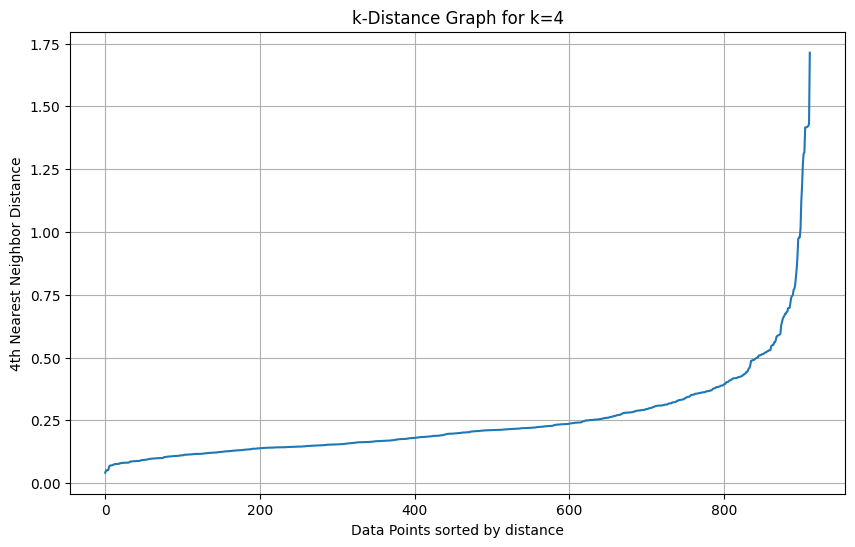

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def plot_k_distance_graph(data, k=4):
    # Fit the NearestNeighbors model
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(data)
    
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances[:, k-1], axis=0)  # Sort the distances to the k-th nearest neighbor
    
    # Plot the k-distance graph
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title(f'k-Distance Graph for k={k}')
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel(f'{k}th Nearest Neighbor Distance')
    plt.grid(True)
    plt.show()

plot_k_distance_graph(data, k=4)


In [5]:
# clusters_bisecting = data_bisecting[['produtividade', 'cluster']]

# clusters_profile_bisecting = (
#     clusters_bisecting
#     .groupby('cluster')
#     .agg(
#         mean_yield=('produtividade', 'mean'),
#         count=('produtividade', 'count')
#     )
#     .reset_index()
#     .sort_values(by='mean_yield', ascending=False)
# )

cluters_kmeans = data_kmeans[['produtividade', 'cluster']]

clusters_profile_kmeans = (
    cluters_kmeans
    .groupby('cluster')
    .agg(
        mean_yield=('produtividade', 'mean'),
        count=('produtividade', 'count')
    )
    .reset_index()
    .sort_values(by='mean_yield', ascending=False)
)

print(clusters_profile_kmeans)


   cluster  mean_yield  count
6        6    0.869810     94
3        3    0.505493    118
7        7    0.480352    134
0        0    0.421352     59
9        9    0.155174    145
1        1    0.050938     82
2        2   -0.016391     85
8        8   -0.445546     97
4        4   -0.943750    121
5        5   -1.132292     87


In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_model_bisecting = ols('produtividade ~ C(cluster)', data=clusters_bisecting).fit()
anova_table_bisecting = sm.stats.anova_lm(anova_model_bisecting, typ=2)

anova_model_kmeans = ols('produtividade ~ C(cluster)', data=cluters_kmeans).fit()
anova_table_kmeans = sm.stats.anova_lm(anova_model_kmeans, typ=2)

print("ANOVA para Bisecting K-means:")
print(anova_table_bisecting)
print("\nANOVA para K-means:")
print(anova_table_kmeans)


ANOVA para Bisecting K-means:
                sum_sq      df          F        PR(>F)
C(cluster)  345.576973     9.0  69.608001  1.159552e-99
Residual    558.243456  1012.0        NaN           NaN

ANOVA para K-means:
                sum_sq      df          F         PR(>F)
C(cluster)  401.867499     9.0  90.023915  8.615548e-123
Residual    501.952929  1012.0        NaN            NaN


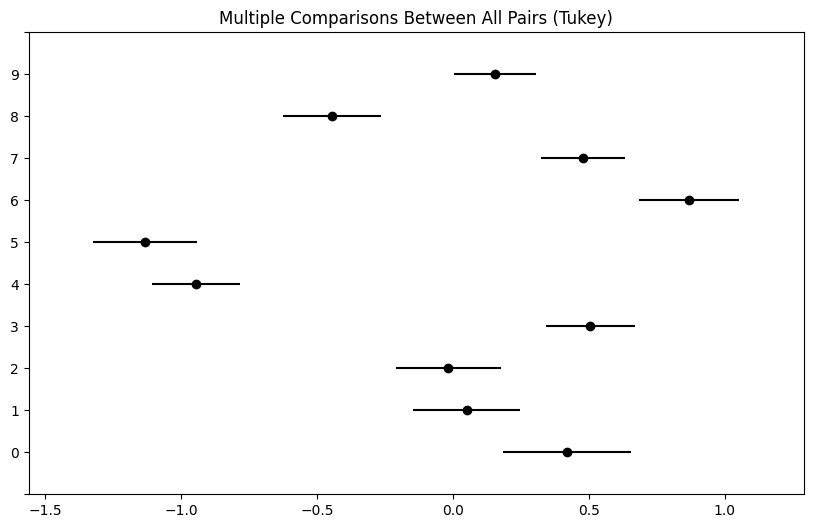

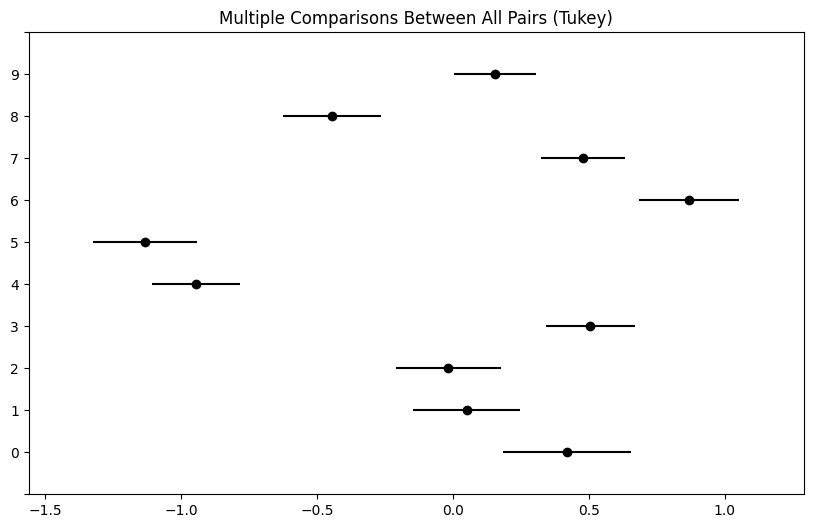

In [6]:
import matplotlib.pyplot as plt
#calculando teste de tukey para comparação entre médias 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(cluters_kmeans['produtividade'], cluters_kmeans['cluster'])
result = mc.tukeyhsd()
result.plot_simultaneous()

In [9]:
data

,produtividade,dataplantioinicio,datacolheitainicio,geometria,textura_1. Arenosa (até 15%),textura_2. Media Arenoso (15~25%),textura_3. Media Argiloso (25~40%),textura_4. Argiloso (40~60%),textura_5. Muito Argiloso (Acima 60%),cluster
0,-2.869472,1.939878,-0.117556,"{""type"": ""Polygon"",""coordinates"":[[[-53.883009...",0,0,0,1,0,1
1,-2.856859,-0.315482,-0.463414,"{""type"": ""Polygon"",""coordinates"":[[[-53.926450...",0,0,0,1,0,1
2,-2.848030,-0.237711,-0.157463,"{""type"": ""Polygon"",""coordinates"":[[[-53.495553...",0,0,1,0,0,1
3,-2.828479,-0.237711,4.152464,"{""type"": ""Polygon"",""coordinates"":[[[-53.529129...",0,0,1,0,0,0
4,-2.782441,-1.482047,-0.556530,"{""type"": ""Polygon"",""coordinates"":[[[-53.553744...",0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2618,2.474130,1.551023,-0.210672,"{""type"": ""Polygon"",""coordinates"":[[[-52.381168...",0,0,1,0,0,3
2619,2.474760,0.151144,-0.250578,"{""type"": ""Polygon"",""coordinates"":[[[-54.165652...",0,0,1,0,0,3
2620,2.491788,-0.626566,-0.223974,"{""type"": ""Polygon"",""coordinates"":[[[-54.106246...",0,0,0,1,0,4
2621,2.599001,-0.393253,-0.157463,"{""type"": ""Polygon"",""coordinates"":[[[-54.109819...",0,0,1,0,0,3


In [18]:
#subtraindo 
columns_to_not_scale = ['produtividade']

columns_to_scale = [column for column in data.columns if column not in columns_to_not_scale]
columns_to_scale

['geometria',
 'soma_chuva_r1-r2',
 'soma_chuva_r2-r3',
 'soma_chuva_r3',
 'soma_chuva_r3-r4',
 'soma_chuva_r3-r4-2',
 'soma_chuva_r4',
 'soma_chuva_r4-r5',
 'soma_chuva_r5',
 'soma_chuva_r5-r6',
 'soma_chuva_r6',
 'soma_chuva_r6-2',
 'soma_chuva_r6-r7',
 'soma_chuva_v0',
 'soma_chuva_v1',
 'soma_chuva_v2-v3',
 'soma_chuva_v4-v5',
 'textura_1. Arenosa (até 15%)',
 'textura_2. Media Arenoso (15~25%)',
 'textura_3. Media Argiloso (25~40%)',
 'textura_4. Argiloso (40~60%)',
 'textura_5. Muito Argiloso (Acima 60%)']